# Analysis of Residuals

## Introduction

Residual analysis is a technique used in linear regression analysis to assess model quality and identify possible problems that may affect the accuracy of predictions. Residuals are calculated after linear regression fitting to the data considering the difference between predicted and observed values. Residual analysis examines these values to verify that they meet model assumptions, such as normal distribution of errors, homogeneity of variance, and independence between residuals. If the residuals do not meet these assumptions, it may indicate the presence of problems in the model, such as heteroscedasticity or autocorrelation of the residuals, which can affect the validity of predictions and conclusions. Residuals analysis is therefore an important step in regression analysis and helps ensure that the model fits the data properly and accurately.    

As we saw earlier, the residuals are given by the difference between the values of the observed response variable and the estimated response variable, that is

\begin{equation*}
e_{i} = y_i - \hat{y}_i, \ \ \ \ \ i = 1,...,n.
\label{eq:1} \tag{1}
\end{equation*}

When carrying out a residual analysis, we intend to verify whether the regression model being used is adequate. For this, the residuals must verify the assumptions previously imposed on the model error. Such assumptions are, considering the model

\begin{equation*}
\mathbf{Y} = \mathbf{\beta} \mathbf{X} + \mathbf{e}
\label{eq:2} \tag{2}
\end{equation*}
with $\mathbf{Y} = (y_1,...,y_n)$, the model matrix, $\mathbf{\beta} = (\beta_1,...,\beta_n)$ and $\mathbf{e} = (e_1,...,e_n)$,

- $e_i$, $i = 1,...,n$ are normally distributed;
- var($e_i$)$ = \sigma^2$ $i = 1,...,n$  has constant variance (Homoscedasticity);
- $e_i$ and $e_j$, $i \neq j $ are independent;
- there are not outliers.

In the case of multiple linear regression, in addition to these assumptions, it is also necessary to check whether there is collinearity or multicollinearity between the explanatory variables. In the following, we present some “techniques” in order to verify these assumptions.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## Normality diagnosis

We will use the residuals generated in the linear regression analysis done earlier in this repository.

In [2]:
residuals1 = np.loadtxt('../data/processed/residuals_model_1.txt')
residuals2 = np.loadtxt('../data/processed/residuals_model_2.txt')
residuals3 = np.loadtxt('../data/processed/residuals_model_3.txt')

In [3]:
residuals1[:,[0,1]]

array([[-15.     ,   3.70645],
       [-14.38776,  -0.78236],
       [-13.77551,  -0.63179],
       [-13.16327,  -1.73798],
       [-12.55102,   2.12217],
       [-11.93878,  -4.22833],
       [-11.32653,   3.84777],
       [-10.71429,  -1.18086],
       [-10.10204,   0.96303],
       [ -9.4898 ,  -0.19039],
       [ -8.87755,   3.21596],
       [ -8.26531,  -3.84514],
       [ -7.65306,  -0.38629],
       [ -7.04082,  -0.52617],
       [ -6.42857,   2.49288],
       [ -5.81633,  -1.99104],
       [ -5.20408,  -0.15272],
       [ -4.59184,  -1.58018],
       [ -3.97959,   0.24336],
       [ -3.36735,   1.30797],
       [ -2.7551 ,  -2.0755 ],
       [ -2.14286,   2.39858],
       [ -1.53061,   1.89571],
       [ -0.91837,   1.08092],
       [ -0.30612,   1.86104],
       [  0.30612,  -1.32473],
       [  0.91837,  -0.21965],
       [  1.53061,  -1.86201],
       [  2.14286,  -0.54285],
       [  2.7551 ,   1.03704],
       [  3.36735,  -1.4236 ],
       [  3.97959,  -0.85038],
       [

### P-P plot

The P-P (Probability-Probability) plot is a statistical tool used to compare the empirical distribution of data with the theoretical distribution. It is often used to diagnose whether a random variable follows a normal distribution. This technique plots the expected probabilities of the theoretical distribution on the x-axis, and the observed probabilities of the empirical distribution on the y-axis. When the points on the graph approach a diagonal line, it indicates that the data follow the theoretical distribution. If not, it may be necessary to check whether the distribution of the data differs from the normal distribution. 

In summary, the P-P plot is a useful tool for assessing the fit of a statistical model to the data and can help identify deviations from the normal distribution.


### Histogram of standardized residuals

A histogram of standardized residuals is a graph that shows the distribution of the standardized residuals of a statistical model. Standardized residuals are the residuals of a model divided by their estimated standard deviation. They are a measure of how far the observed values deviate from the predicted values of the model in units of standard deviation.

In summary, this technique provides a visual representation of the distribution of residuals in a statistical model and can help identify potential issues with the regression model fit.
### Kolmogorov-Smirnov test

The Kolmogorov-Smirnov test is a non-parametric test used to assess whether a data sample follows a specific distribution. It is based on comparing the empirical distribution of the data (observed distribution) with the assumed theoretical distribution. 


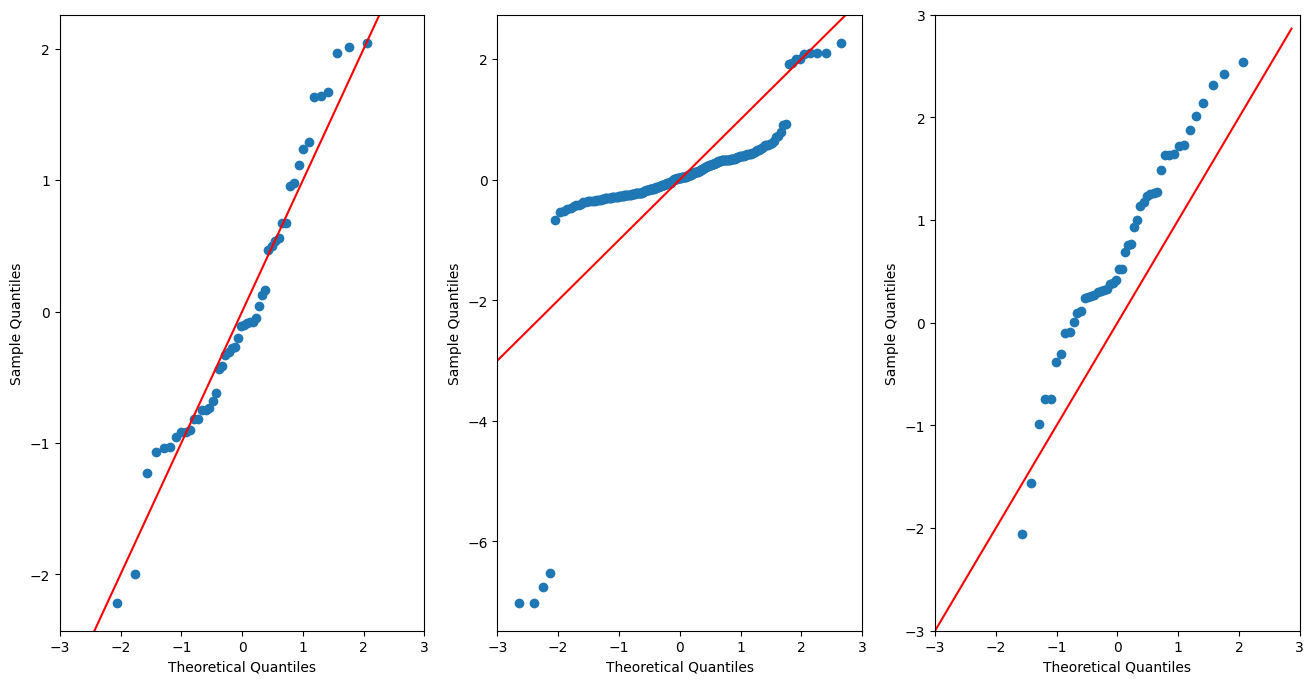

In [4]:
# Ajustar modelo aos dados
# ...

fig, axs = plt.subplots(1, 3, sharex=True, figsize=(16, 8))
# Criar gráfico P-P

sm.qqplot(residuals1[:,2], line='45', ax = axs[0])
sm.qqplot(residuals2[:,2], line='45', ax = axs[1])
sm.qqplot(residuals3[:,2], line='45', ax = axs[2])

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

(array([ 1.,  1.,  1.,  1.,  3.,  4., 16.,  8., 10.,  5.]),
 array([-3.90094 , -3.256609, -2.612278, -1.967947, -1.323616, -0.679285,
        -0.034954,  0.609377,  1.253708,  1.898039,  2.54237 ]),
 <BarContainer object of 10 artists>)

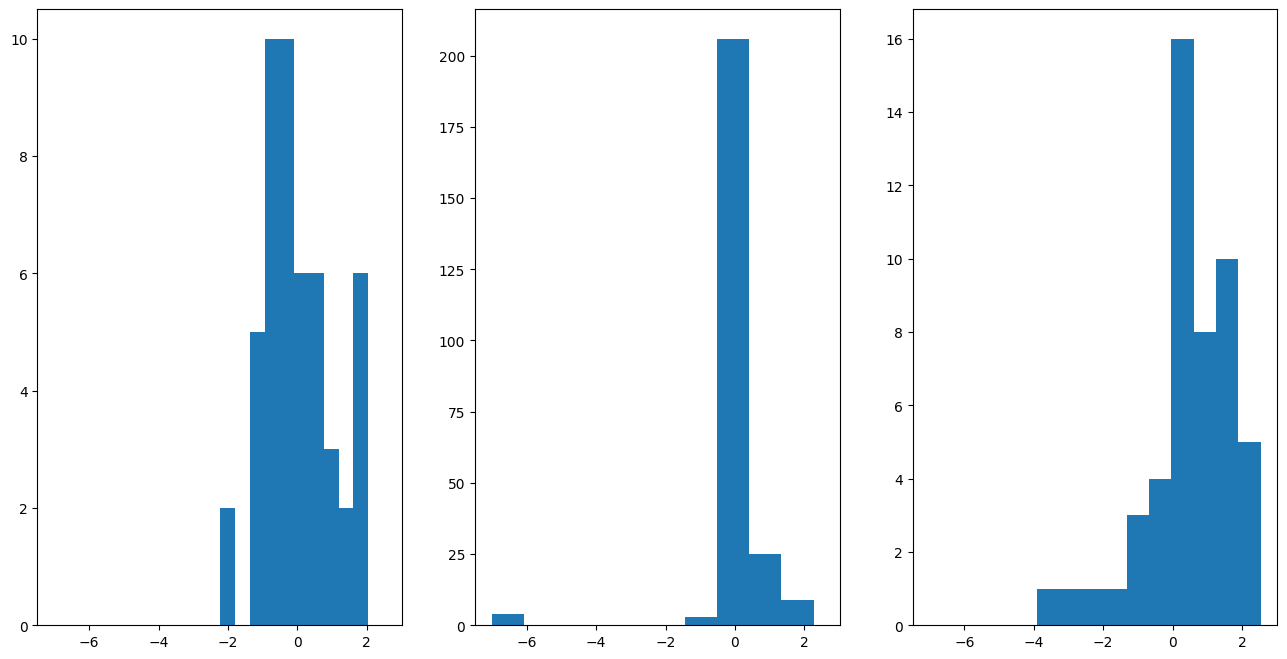

In [5]:

fig, axs = plt.subplots(1, 3, sharex=True, figsize=(16, 8))

axs[0].hist(residuals1[:,2])
axs[1].hist(residuals2[:,2])
axs[2].hist(residuals3[:,2])

In [6]:
from scipy.stats import kstest

kstest(residuals1[:,2], 'norm')

KstestResult(statistic=0.12083126948068929, pvalue=0.42517797362094245, statistic_location=-0.05224, statistic_sign=1)